In [1]:
import json
import pandas as pd
import seaborn as sns



In [2]:
#read json file 
df_t = pd.read_json('database.json')

#get info about data
df_t.info

<bound method DataFrame.info of                                                                    1198490  \
type                                                                  game   
name                                              All That Remains: Part 1   
steam_appid                                                        1198490   
required_age                                                             0   
is_free                                                              False   
detailed_description     “Duncan Price is paranoid” they used to say. H...   
about_the_game           “Duncan Price is paranoid” they used to say. H...   
short_description        “Duncan Price is paranoid” they used to say. H...   
supported_languages      English<strong>*</strong>, French, Italian, Ge...   
header_image             https://cdn.akamai.steamstatic.com/steam/apps/...   
website                                              https://glitch.games/   
pc_requirements          {'minim

In [3]:
#Transpose data columns with rows
df = df_t.T

In [4]:
# Missing Data
df.isnull().sum()

type                          0
name                          0
steam_appid                   0
required_age                  0
is_free                       0
detailed_description          0
about_the_game                0
short_description             0
supported_languages           0
header_image                  0
website                    1673
pc_requirements               0
mac_requirements              0
linux_requirements            0
legal_notice               3056
developers                    3
publishers                    0
price_overview              372
packages                    336
package_groups                0
platforms                     0
categories                   69
genres                        3
screenshots                   2
movies                       79
release_date                  0
support_info                  0
background                    0
content_descriptors           0
num_reviews                   0
review_score                  0
review_s

In [5]:
game = df[['steam_appid','name','required_age', 'is_free', 'supported_languages', 'price_overview', 
           'developers', 'publishers', 'platforms', 'categories', 'release_date',
           'num_reviews', 'review_score', 'review_score', 'total_positive', 'total_negative','genres']]

In [6]:
#required_age unique elements

df.required_age.unique()

array([0, '16', '18', '12', '17', '13', '1', '15', '10', '7'],
      dtype=object)

<AxesSubplot:>

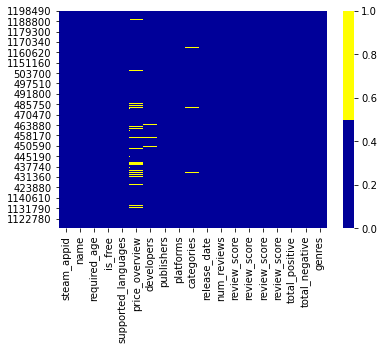

In [7]:
#check missing values at heat map
cols = game.columns[:] # all columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(game[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
# check null values sum
game.isnull().sum()

steam_appid              0
name                     0
required_age             0
is_free                  0
supported_languages      0
price_overview         372
developers               3
publishers               0
platforms                0
categories              69
release_date             0
num_reviews              0
review_score             0
review_score             0
total_positive           0
total_negative           0
genres                   3
dtype: int64

In [9]:
# drop null values from 'price_overview'
game = game.dropna(subset = ['price_overview'])


In [10]:
# drop null values from 'developers'
game = game.dropna(subset = ['developers'])


In [11]:
# drop null values from 'genres'

game = game.dropna(subset = ['genres'])


In [12]:
# drop null values from 'categories'
game = game.dropna(subset = ['categories'])


In [13]:
game.isnull().sum()

steam_appid            0
name                   0
required_age           0
is_free                0
supported_languages    0
price_overview         0
developers             0
publishers             0
platforms              0
categories             0
release_date           0
num_reviews            0
review_score           0
review_score           0
total_positive         0
total_negative         0
genres                 0
dtype: int64

In [14]:
# to check for dublicated values
game.describe()

,steam_appid,name,required_age,is_free,supported_languages,price_overview,developers,publishers,platforms,categories,release_date,num_reviews,review_score,review_score,total_positive,total_negative,genres
count,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192
unique,4189,4188,8,1,1112,221,3539,3092,4,861,1123,20,9,9,537,259,389
top,359550,Tom Clancy's Rainbow Six® Siege,0,False,English,"{'currency': 'EUR', 'initial': 399, 'final': 3...",[Sokpop Collective],[Big Fish Games],"{'windows': True, 'mac': False, 'linux': False}","[{'id': 2, 'description': 'Single-player'}]","{'coming_soon': False, 'date': '17 Jan, 2020'}",1,0,0,1,0,"[{'id': '1', 'description': 'Action'}, {'id': ..."
freq,4,4,4118,4192,1221,385,25,56,2912,824,35,1298,1864,1864,492,845,319


In [15]:
#names are dublicated so lets drop the dublicate values
game.drop_duplicates(subset='name', inplace=True)

In [16]:
#check if is it works ?
game.describe()

,steam_appid,name,required_age,is_free,supported_languages,price_overview,developers,publishers,platforms,categories,release_date,num_reviews,review_score,review_score,total_positive,total_negative,genres
count,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188
unique,4188,4188,8,1,1112,221,3538,3091,4,861,1123,20,9,9,537,259,389
top,1187840,Shrine to Anubis,0,False,English,"{'currency': 'EUR', 'initial': 399, 'final': 3...",[Sokpop Collective],[Big Fish Games],"{'windows': True, 'mac': False, 'linux': False}","[{'id': 2, 'description': 'Single-player'}]","{'coming_soon': False, 'date': '17 Jan, 2020'}",1,0,0,1,0,"[{'id': '1', 'description': 'Action'}, {'id': ..."
freq,1,1,4114,4188,1221,385,25,56,2908,823,35,1297,1860,1860,489,843,319


In [20]:
game.to_csv('cleandata', index=False)


In [17]:
'''Game
-
Steam_appid int PK
Name string
Required_age  int
Is_free  Bool
Release_date date


Language
-
Language_id int PK
Steam_appid int FK >- Game.Steam_appid
Supported_languages string

Price
-
Price_id int PK
Steam_appid int FK >- Game.Steam_appid
Currency string
Initial money
Final money

Legality
-
Legality_id int PK
Steam_appid int FK >- Game.Steam_appid
Legal_notice string
Devolopers string
Publishers string

Platforms
-
Platforms_id int PK
Legality_id int FK >- Legality.Legality_id
Mac Bool
Linux Bool
Windosw Bool

Categories
-
Catagories_id int PK
Steam_appid int FK >- Game.Steam_appid
Single_player Bool
Multiple_player Bool

Reviews
-
Reviews_id int PK
Steam_appid int FK >- Game.Steam_appid
Num_reviews int
Review_score int
Total_positive int
Total_negative int


'''

'Game\n-\nSteam_appid int PK\nName string\nRequired_age  int\nIs_free  Bool\nRelease_date date\n\n\nLanguage\n-\nLanguage_id int PK\nSteam_appid int FK >- Game.Steam_appid\nSupported_languages string\n\nPrice\n-\nPrice_id int PK\nSteam_appid int FK >- Game.Steam_appid\nCurrency string\nInitial money\nFinal money\n\nLegality\n-\nLegality_id int PK\nSteam_appid int FK >- Game.Steam_appid\nLegal_notice string\nDevolopers string\nPublishers string\n\nPlatforms\n-\nPlatforms_id int PK\nLegality_id int FK >- Legality.Legality_id\nMac Bool\nLinux Bool\nWindosw Bool\n\nCategories\n-\nCatagories_id int PK\nSteam_appid int FK >- Game.Steam_appid\nSingle_player Bool\nMultiple_player Bool\n\nReviews\n-\nReviews_id int PK\nSteam_appid int FK >- Game.Steam_appid\nNum_reviews int\nReview_score int\nTotal_positive int\nTotal_negative int\n\n\n'